2nd attempt at making my own simple neural network!


Neural network with 1 hidden layer of size 2
Current loss: 0.3333333333333333
Inputs: [[0. ]
 [0.5]
 [1. ]]
Layer: [[0.  0.7]
 [0.2 0.2]
 [0.7 0. ]]
Outputs: [[0.]
 [0.]
 [0.]]
Weights1: [[ 1 -1]]
Bias1: [[-0.3  0.7]]
Weights2: [[-0.298 ]
 [-0.1476]]
Bias2: [0.]
d_weights2 = f[[0.4]
 [0.4]]
  2*(self.y - self.output) = f[[0.]
 [2.]
 [0.]]
  d_activation(self.output) = f[[1]
 [1]
 [1]]
  z = f[[0.]
 [2.]
 [0.]]
d_bias2 = f[2.]
  2*(self.y - self.output) = f[[0.]
 [2.]
 [0.]]
  d_activation(self.output) = f[[1]
 [1]
 [1]]
  z = f[[0.]
 [2.]
 [0.]]

Testing epoch #1

Neural network with 1 hidden layer of size 2
Current loss: 3.391832054779133
Inputs: [[0. ]
 [0.5]
 [1. ]]
Layer: [[0.  0.7]
 [0.2 0.2]
 [0.7 0. ]]
Outputs: [[2.1767]
 [2.0709]
 [2.0714]]
Weights1: [[ 1 -1]]
Bias1: [[-0.3  0.7]]
Weights2: [[0.102 ]
 [0.2524]]
Bias2: [2.]
d_weights2 = f[[-3.3283]
 [-3.4758]]
  2*(self.y - self.output) = f[[-4.3534]
 [-2.1418]
 [-4.1428]]
  d_activation(self.output) = f[[1]
 [1]
 [1]]
  z = f[

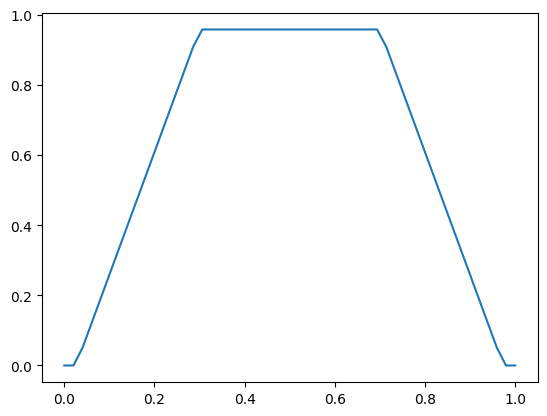

In [40]:
import numpy as np
from matplotlib import pyplot as plt

def sigmoid(x):
    return 1/(1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x >= 0, 1, 0)

activation = relu
d_activation = relu_derivative

np.set_printoptions(precision=4, linewidth=200)

class NeuralNet:
    # What is the type of x and y???
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.input = self.x
        # self.weights1 = np.random.rand(x.shape[1], 2) - 0.5
        # self.bias1 = np.zeros(2)
        self.weights2 = np.random.rand(2, 1) - 0.5
        self.bias2 = np.zeros(1)
        self.weights1 = np.array([[1, -1]])
        self.bias1 = np.array([[-0.3, 0.7]])
        #self.weights2 = np.array([[-3.1], [-3.2]])
        #self.bias2 = np.array([[2.2]])
        self.output = np.zeros(self.y.shape)
        self.learning_rate = 1

    def feedforward(self):
        # print(f"layer1 z = {np.dot(self.input, self.weights1) + self.bias1}")
        layer1 = activation(np.dot(self.input, self.weights1) + self.bias1)
        self.layer1 = layer1
        # print(f"layer1 = {self.layer1}")
        # print(f"output z = {np.dot(self.layer1, self.weights2) + self.bias2}")
        output = activation(np.dot(layer1, self.weights2) + self.bias2)
        self.output = output
        # print(f"output = {self.output}")

    def backpropagate(self):
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * d_activation(self.output)))
        print(f"d_weights2 = f{d_weights2}")
        print(f"  2*(self.y - self.output) = f{2*(self.y - self.output)}")
        print(f"  d_activation(self.output) = f{d_activation(self.output)}")
        print(f"  z = f{2*(self.y - self.output) * d_activation(self.output)}")
        d_bias2 = np.sum(2*(self.y - self.output) * d_activation(self.output), axis=0)
        print(f"d_bias2 = f{d_bias2}")
        print(f"  2*(self.y - self.output) = f{2*(self.y - self.output)}")
        print(f"  d_activation(self.output) = f{d_activation(self.output)}")
        print(f"  z = f{2*(self.y - self.output) * d_activation(self.output)}")
        # print(f"d_bias2 = {d_bias2}")
        # print(f"bias2 = {self.bias2}")
        #d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T) * d_activation(self.layer1)))
        #d_bias1 = (np.dot(2*(self.y - self.output) * d_activation(self.output), self.weights2.T) * d_activation(self.layer1))
        #print(f"d_bias1 = {d_bias1}")
        #self.weights1 += d_weights1 * self.learning_rate
        #self.bias1 += d_bias1 * self.learning_rate
        self.weights2 += d_weights2 * self.learning_rate
        self.bias2 += d_bias2 * self.learning_rate

    def display(self):
        print()
        print("Neural network with 1 hidden layer of size 2")
        print(f"Current loss: {self.loss()}")
        print(f"Inputs: {self.input}")
        print(f"Layer: {self.layer1}")
        print(f"Outputs: {self.output}")
        print(f"Weights1: {self.weights1}")
        print(f"Bias1: {self.bias1}")
        print(f"Weights2: {self.weights2}")
        print(f"Bias2: {self.bias2}")

    def test(self, inputs):
        #print(f"layer1 z = {np.dot(inputs, self.weights1) + self.bias1}")
        layer1 = activation(np.dot(inputs, self.weights1) + self.bias1)
        #print(f"layer1 = {self.layer1}")
        #print(f"output z = {np.dot(self.layer1, self.weights2) + self.bias2}")
        output = activation(np.dot(layer1, self.weights2) + self.bias2)
        #print(f"output = {self.output}")
        return output

    def loss(self):
        return np.average((self.y - self.output) ** 2)

    def mean_of_square_errors(predicted, actual):
        if len(predicted) != len(actual):
            sys.exit("mean_of_square_errors: Predict and actual are different length")
        sum = 0
        for i in range(len(predicted)):
            sum += (predicted[i] - actual[i]) ** 2
        return sum / len(predicted)

# Add function to plot shape of x vs y
def plot(nn):
    x = np.linspace(0, 1)
    y = nn.test(np.array(x)[np.newaxis].T)
    plt.plot(x,y)

x = np.array([ [0], [0.5], [1] ])
y = np.array([ [0], [1], [0] ])

nn = NeuralNet(x,y)

nn.feedforward()
nn.display()
for i in range(100):
    nn.backpropagate()
    nn.feedforward()
    print(f"\nTesting epoch #{i+1}")
    nn.display()
    if nn.loss() < 0.01:
        break

plot(nn)
